In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import

In [3]:
df = pd.read_csv('./data/Mall_Customers.csv')

In [4]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Data Cleaning

In [5]:
# Remove extra index

df = df.drop('CustomerID', axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [6]:
# Convert gender to numerical dumy variable

df['Gender'] = df['Gender'].astype('category').cat.codes
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [7]:
pd.isnull(df).sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## EDA

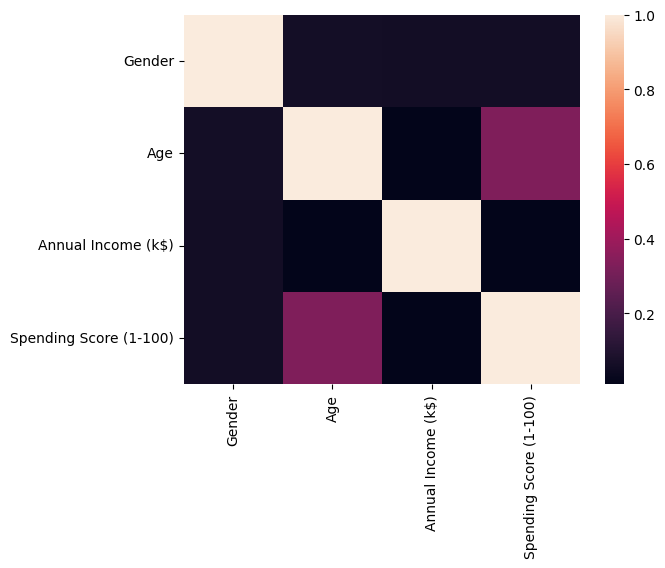

In [7]:
# Visualize feature correlations

sns.heatmap(df.corr().abs())
plt.show()

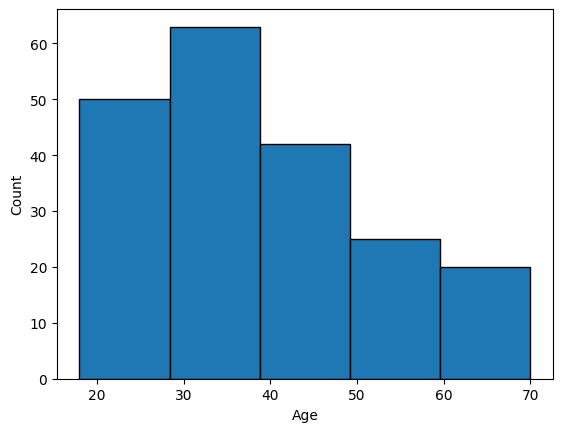

In [8]:
# Visualize age distribution

plt.hist(df['Age'], bins=5, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

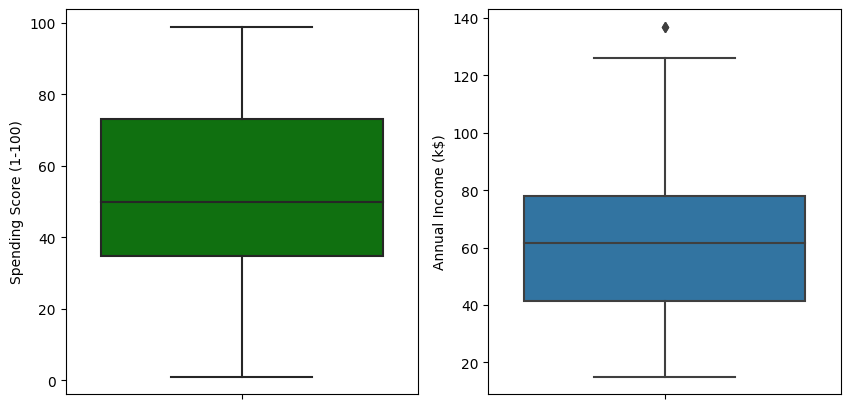

In [9]:
# Compare spending score and annual income distributions

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y=df['Spending Score (1-100)'], color='g')
plt.subplot(1,2,2)
sns.boxplot(y=df['Annual Income (k$)'])
plt.show()

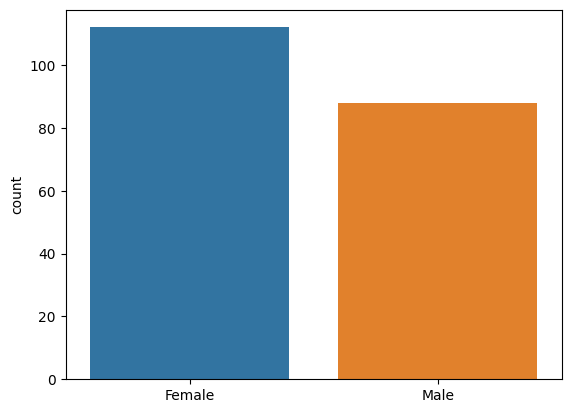

In [10]:
# Compare gender distributions

sns.barplot(x=['Female', 'Male'], y=df['Gender'].value_counts())
plt.show()

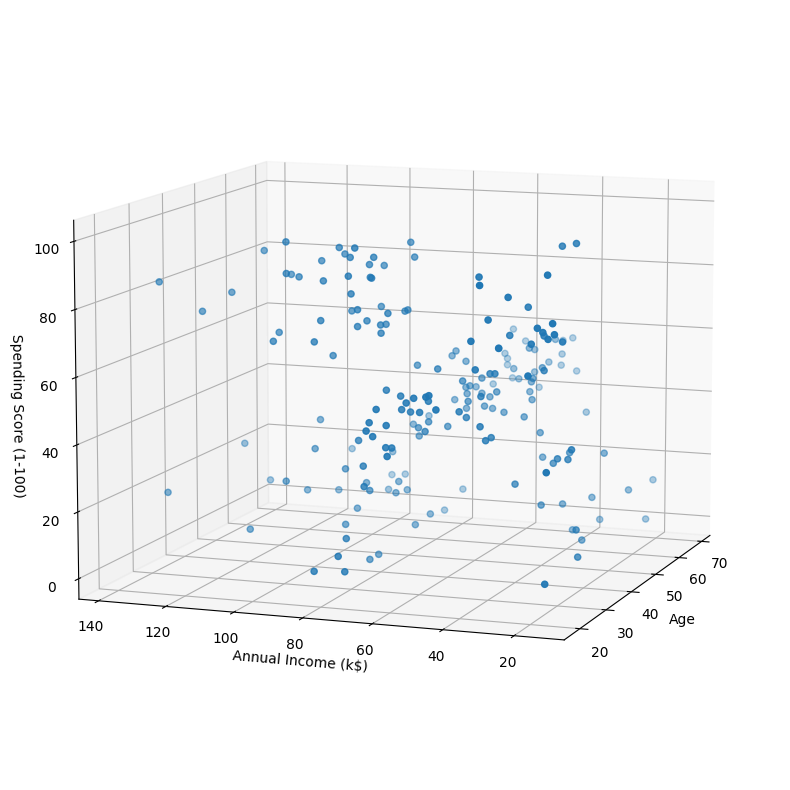

In [11]:
# Visualize 3D scatterplot

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'])
ax.view_init(10, 200)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')

plt.show()

## Modeling

In [8]:
from sklearn.cluster import KMeans

In [11]:
# Select training features

features = ['Annual Income (k$)', 'Age', 'Spending Score (1-100)']
train = df[features]
train.head()

,Annual Income (k$),Age,Spending Score (1-100)
0,15,19,39
1,15,21,81
2,16,20,6
3,16,23,77
4,17,31,40


### Elbow method

In [14]:
# Calculate SSE for 1 through 11 clusters

SSE = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, n_init=10)
    km.fit(train)
    SSE.append(km.inertia_)

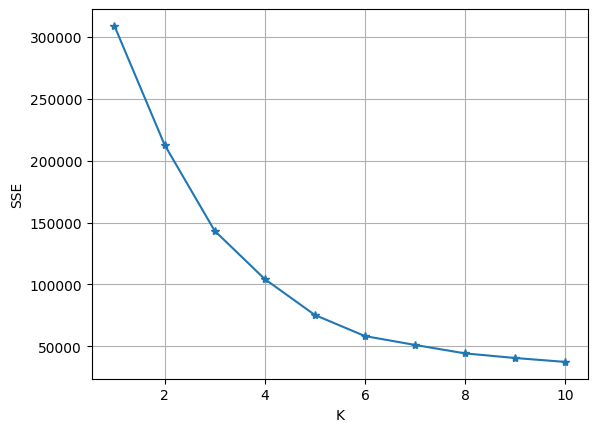

In [15]:
# Plot elbow curve

plt.plot(range(1,11), SSE, marker='*')
plt.xlabel("K")
plt.ylabel("SSE")
plt.grid()
plt.show()

### Model fitting

In [12]:
# Fit model with 5 clusters

km = KMeans(n_clusters=5, n_init=10)
clusters = km.fit_predict(train)

In [13]:
train['Cluster'] = clusters
train

,Annual Income (k$),Age,Spending Score (1-100),Cluster
0,15,19,39,3
1,15,21,81,1
2,16,20,6,3
3,16,23,77,1
4,17,31,40,3
...,...,...,...,...
195,120,35,79,0
196,126,45,28,4
197,126,32,74,0
198,137,32,18,4


In [14]:
# Isolate clusters into individual dataframes

cluster0 = train[train['Cluster'] == 0]
cluster1 = train[train['Cluster'] == 1]
cluster2 = train[train['Cluster'] == 2]
cluster3 = train[train['Cluster'] == 3]
cluster4 = train[train['Cluster'] == 4]

### Model visualization

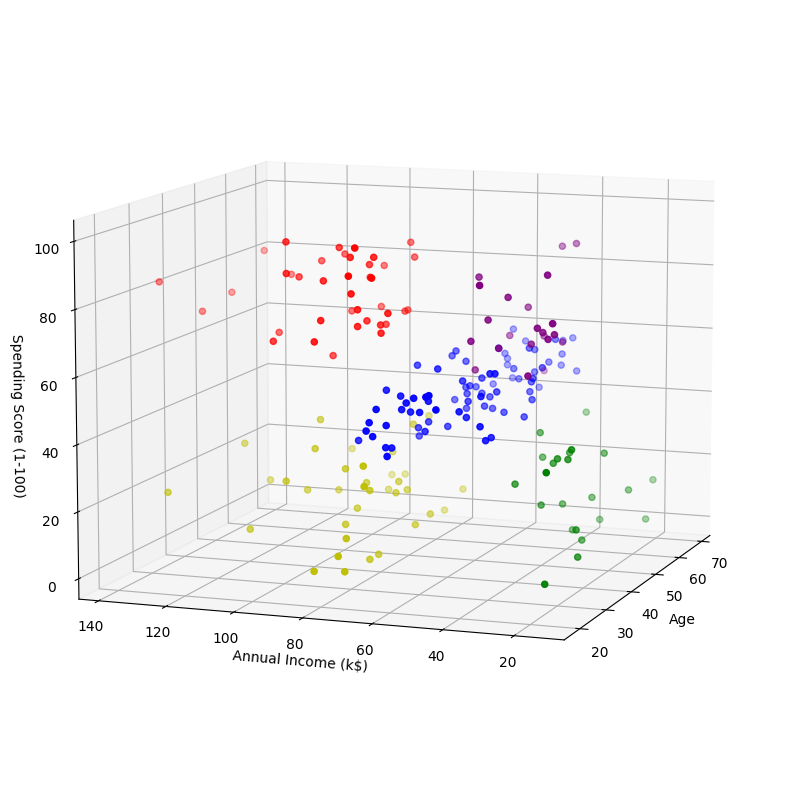

In [58]:
# Visualize clusters in 3D space

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.view_init(10, 200)

ax.scatter(cluster0['Age'], cluster0['Annual Income (k$)'], cluster0["Spending Score (1-100)"], c='b')
ax.scatter(cluster1['Age'], cluster1['Annual Income (k$)'], cluster1["Spending Score (1-100)"], c='r')
ax.scatter(cluster2['Age'], cluster2['Annual Income (k$)'], cluster2["Spending Score (1-100)"], c='g')
ax.scatter(cluster3['Age'], cluster3['Annual Income (k$)'], cluster3["Spending Score (1-100)"], c='y')
ax.scatter(cluster4['Age'], cluster4['Annual Income (k$)'], cluster4["Spending Score (1-100)"], c='purple')

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')

plt.show()

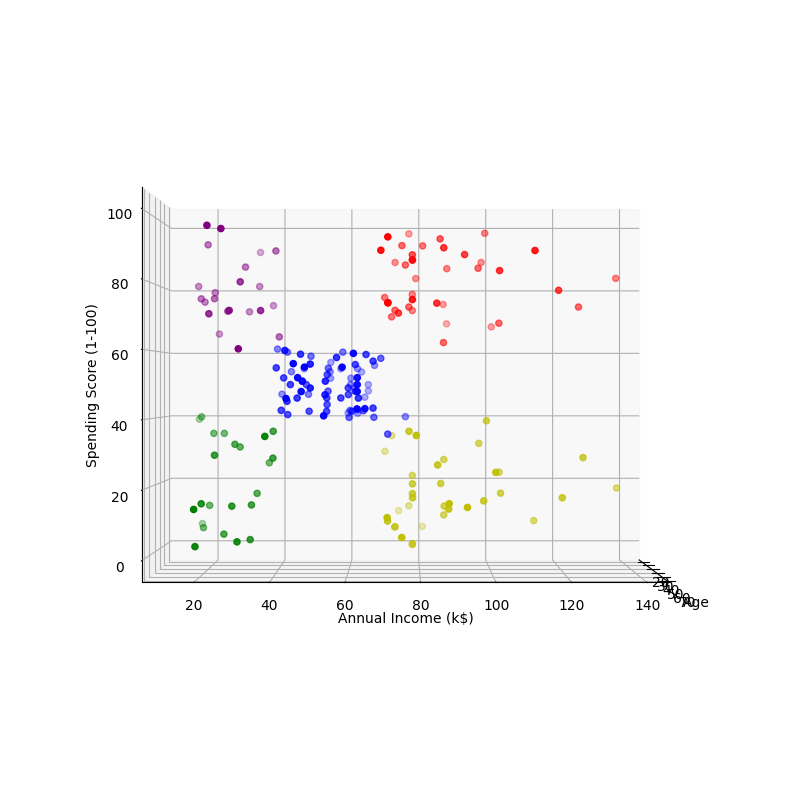

In [62]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.view_init(0, 0)

ax.scatter(cluster0['Age'], cluster0['Annual Income (k$)'], cluster0["Spending Score (1-100)"], c='b')
ax.scatter(cluster1['Age'], cluster1['Annual Income (k$)'], cluster1["Spending Score (1-100)"], c='r')
ax.scatter(cluster2['Age'], cluster2['Annual Income (k$)'], cluster2["Spending Score (1-100)"], c='g')
ax.scatter(cluster3['Age'], cluster3['Annual Income (k$)'], cluster3["Spending Score (1-100)"], c='y')
ax.scatter(cluster4['Age'], cluster4['Annual Income (k$)'], cluster4["Spending Score (1-100)"], c='purple')

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')

plt.show()

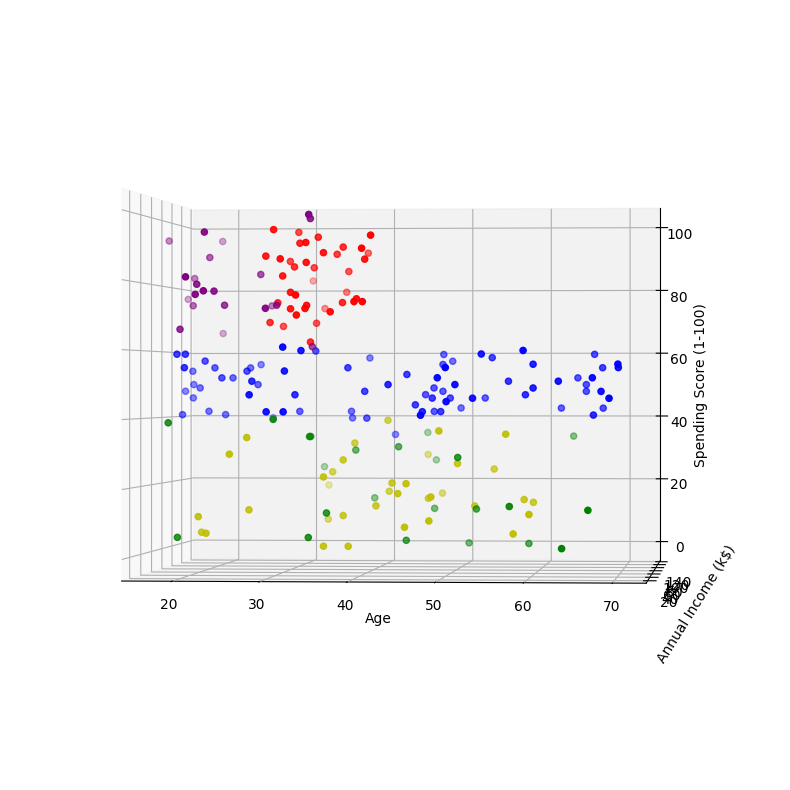

In [66]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.view_init(0, -85)

ax.scatter(cluster0['Age'], cluster0['Annual Income (k$)'], cluster0["Spending Score (1-100)"], c='b')
ax.scatter(cluster1['Age'], cluster1['Annual Income (k$)'], cluster1["Spending Score (1-100)"], c='r')
ax.scatter(cluster2['Age'], cluster2['Annual Income (k$)'], cluster2["Spending Score (1-100)"], c='g')
ax.scatter(cluster3['Age'], cluster3['Annual Income (k$)'], cluster3["Spending Score (1-100)"], c='y')
ax.scatter(cluster4['Age'], cluster4['Annual Income (k$)'], cluster4["Spending Score (1-100)"], c='purple')

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')

plt.show()